<img src="https://www3.um.edu.uy/logoum.jpg" width=300>
<h1 align="center">Thesis - KNN Item Item Precision and Recall</h1> 
<h2 align="center">Alejo Paullier</h2> 

https://lkpy.lenskit.org/en/stable/knn.html

# Import libraries and define evaluation function

In [1]:
from lenskit import batch, topn, util
from lenskit import crossfold as xf
from lenskit.algorithms import Recommender, als, item_knn as knn
from lenskit import topn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import style
import seaborn as sns
import numpy as np
import scipy as sp
import pylab as pl



ratings = pd.read_csv('C:\\Users\\Alejo\\Tesis\\Demo\\ml-100k\\u.data', sep='\t',
                      names=['user', 'item', 'rating', 'timestamp'])


def eval(aname, algo, train, test):
    fittable = util.clone(algo) # Object cloning means to create an exact copy of the original object.
    fittable = Recommender.adapt(fittable) 
    fittable.fit(train) # Entrenamos el algoritmo con el training dataset
    users = test.user.unique() # Devuelve un array con los users unicos en el testing dataset
    # now we run the recommender
    recs = batch.recommend(fittable, users, 100)
    # add the algorithm name for analyzability
    recs['Algorithm'] = aname
    return recs

# Run manual optimization

In [ ]:
neighbours = []
precision = [[] for _ in range(5)]
recall =  [[] for _ in range(5)]

for i in range(1,21):
    neighbours.append(i*5)
    
for j in range(5):    
    for neighbour in neighbours:
        print(neighbour)
        all_recs = []
        test_data = []
        algo_ii = knn.ItemItem(neighbour,aggregate='weighted-average')

        for train, test in xf.partition_users(ratings[['user', 'item', 'rating']], 5, xf.SampleFrac(0.2)):
            test_data.append(test)
            all_recs.append(eval('ItemItem', algo_ii, train, test))

        all_recs = pd.concat(all_recs, ignore_index=True)
        all_recs.head()

        test_data = pd.concat(test_data, ignore_index=True)

        rla1 = topn.RecListAnalysis()
        rla2 = topn.RecListAnalysis()
        rla1.add_metric(topn.precision)
        rla2.add_metric(topn.recall)
        prec = rla1.compute(all_recs, test_data)
        rec = rla2.compute(all_recs, test_data)

        precision[j].append(prec["precision"].mean())
        recall[j].append(rec["recall"].mean())

# Load previously ran output

In [3]:
precision = pd.read_csv('C:\\Users\\Alejo\\Tesis\\Algoritmos\\KNN Item Item\\Manual optimization results\\precision.csv', sep=',')
recall = pd.read_csv('C:\\Users\\Alejo\\Tesis\\Algoritmos\\KNN Item Item\\Manual optimization results\\recall.csv', sep=',')
Fmetric = pd.read_csv('C:\\Users\\Alejo\\Tesis\\Algoritmos\\KNN Item Item\\Manual optimization results\\Fmetric.csv', sep=',')
neighbours = pd.DataFrame(neighbours)

precision =  pd.concat([neighbours,precision],axis=1)
recall =  pd.concat([neighbours,recall],axis=1)
Fmetric =  pd.concat([neighbours,Fmetric],axis=1)

names = columns=["neighbours","1","2","3","4","5"]
precision.columns = names
recall.columns = names
Fmetric.columns = names

# Precision optimal number of neighbours

In [43]:
print("Highest precision:",max(precision[["1","2","3","4","5"]].mean(axis=1)))
idx = precision[["1","2","3","4","5"]].mean(axis=1).idxmax()
print("Optimal number of neighbours:", precision.iloc[idx]['neighbours'])
average = precision[["1","2","3","4","5"]].mean(axis=1)
average = pd.DataFrame(average)
average = pd.concat([neighbours,average],axis=1)
average.columns = ['Neighbours','Average Precision']
average

Highest precision: 0.041100742311770994
Optimal number of neighbours: 30.0


,Neighbours,Average Precision
0,5,0.037669
1,10,0.039642
2,15,0.040223
3,20,0.040730
4,25,0.040969
5,30,0.041101
6,35,0.040498
7,40,0.040422
8,45,0.040609
9,50,0.040751


# Average Plot 

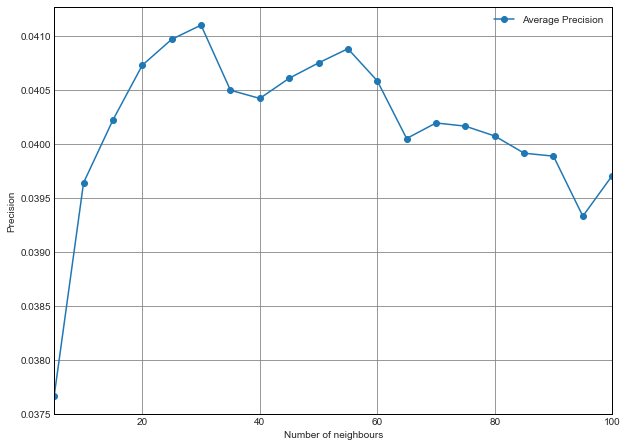

In [44]:
average.plot(x='Neighbours',y='Average Precision',grid=True, figsize=(10,7.5),marker='o')
style.use('seaborn-whitegrid')
plt.grid(color='gray')
plt.rc_context({'axes.edgecolor':'black'})
pl.xlabel("Number of neighbours")
pl.ylabel("Precision")
plt.legend(loc='upper right')
plt.savefig('average_precision')

# Recall optimal number of neighbours

In [41]:
print("Highest recall:",max(recall[["1","2","3","4","5"]].mean(axis=1)))
idx = recall[["1","2","3","4","5"]].mean(axis=1).idxmax()
print("Optimal number of neighbours:", recall.iloc[idx]['neighbours'])
average = recall[["1","2","3","4","5"]].mean(axis=1)
average = pd.DataFrame(average)
average = pd.concat([neighbours,average],axis=1)
average.columns = ['Neighbours','Average Recall']
average

Highest recall: 0.17418506016814078
Optimal number of neighbours: 25.0


,Neighbours,Average Recall
0,5,0.162819
1,10,0.170302
2,15,0.171068
3,20,0.173265
4,25,0.174185
5,30,0.173944
6,35,0.169428
7,40,0.170509
8,45,0.171304
9,50,0.171823


# Average Recall

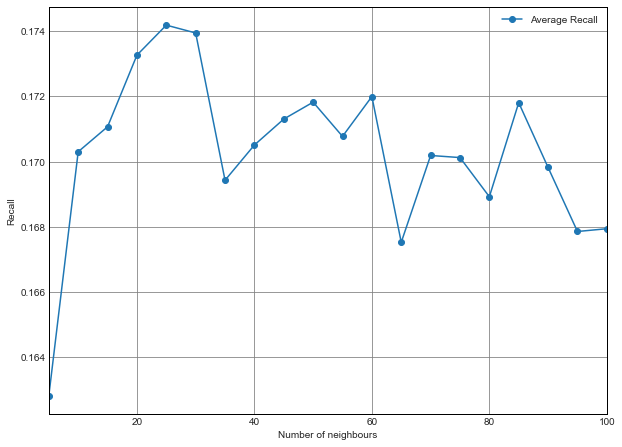

In [42]:
average.plot(x='Neighbours',y='Average Recall',grid=True, figsize=(10,7.5),marker='o')
style.use('seaborn-whitegrid')
plt.grid(color='gray')
plt.rc_context({'axes.edgecolor':'black'})
pl.xlabel("Number of neighbours")
pl.ylabel("Recall")
plt.legend(loc='upper right')
plt.savefig('average_recall')

# F-metric optimal number of neighbours

In [38]:
print("Highest F-metric:",max(Fmetric[["1","2","3","4","5"]].mean(axis=1)))
idx = Fmetric[["1","2","3","4","5"]].mean(axis=1).idxmax()
print("Optimal number of neighbours:", Fmetric.iloc[idx]['neighbours'])
average = Fmetric[["1","2","3","4","5"]].mean(axis=1)
average = pd.DataFrame(average)
average = pd.concat([neighbours,average],axis=1)
average.columns = ['Neighbours','Average F1']
average

Highest F-metric: 0.0664898208
Optimal number of neighbours: 30.0


,Neighbours,Average F1
0,5,0.061183
1,10,0.064312
2,15,0.065130
3,20,0.065954
4,25,0.066335
5,30,0.066490
6,35,0.065371
7,40,0.065350
8,45,0.065653
9,50,0.065876


# Average Fmetric plot

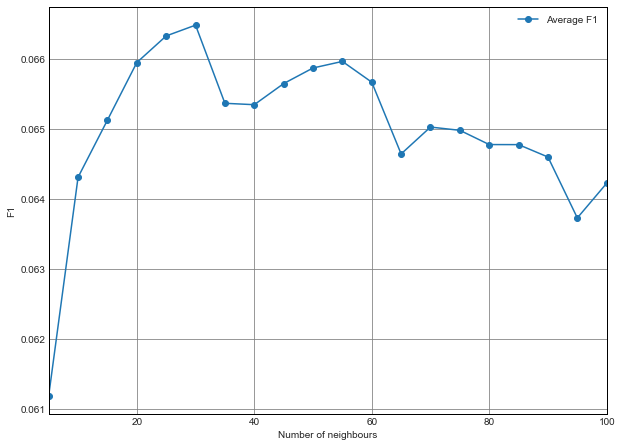

In [40]:
average.plot(x='Neighbours',y='Average F1',grid=True, figsize=(10,7.5),marker='o')
style.use('seaborn-whitegrid')
plt.grid(color='gray')
plt.rc_context({'axes.edgecolor':'black'})
pl.xlabel("Number of neighbours")
pl.ylabel("F1")
plt.legend(loc='upper right')

# Precision plot

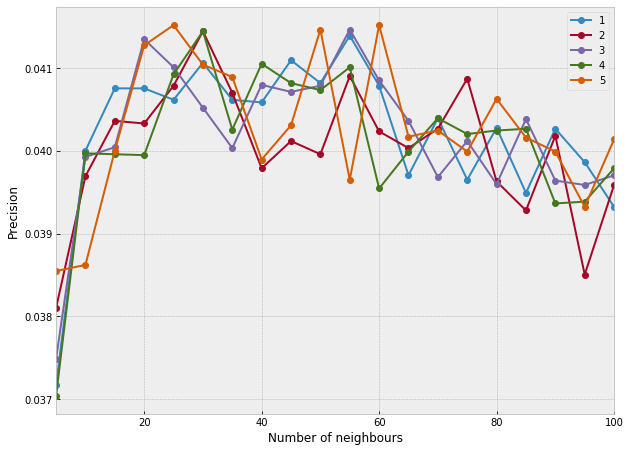

In [143]:
precision.plot(x="neighbours", y = ["1","2","3","4","5"], grid=True, figsize=(10,7.5),marker='o')
style.use('bmh')
pl.xlabel("Number of neighbours")
pl.ylabel("Precision")
plt.legend(loc='upper right')

# Recall plot

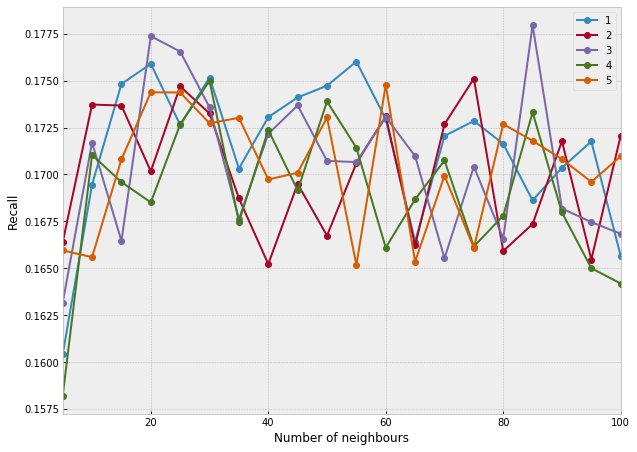

In [11]:
recall.plot(x="neighbours", y = ["1","2","3","4","5"], grid=True, figsize=(10,7.5),marker='o')
style.use('bmh')
pl.xlabel("Number of neighbours")
pl.ylabel("Recall")
plt.legend(loc='upper right')

# F-metric plot

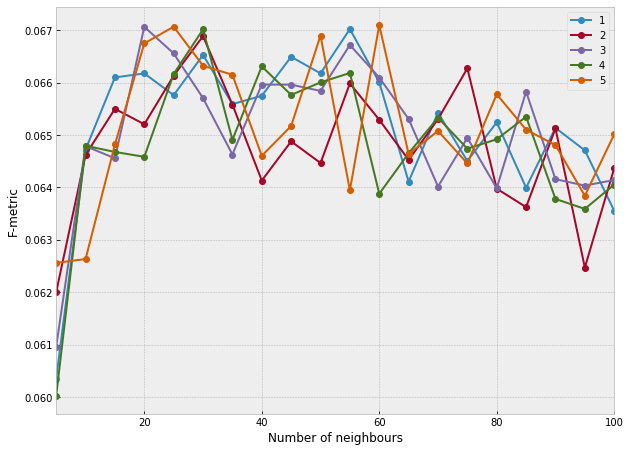

In [145]:
Fmetric.plot(x="neighbours", y = ["1","2","3","4","5"], grid=True, figsize=(10,7.5),marker='o')
style.use('bmh')
pl.xlabel("Number of neighbours")
pl.ylabel("F-metric")
plt.legend(loc='upper right')